# Statistical Arbitrage by Pairs Trading

In [17]:
import numpy as np
import pandas as pd
import pandas_datareader as dr
from matplotlib.ticker import FuncFormatter
from datetime import date
from pandas_datareader import data as pdr

In [40]:
tickers = ['AAPL','MSFT','AMZN','FB','GOOGL','GOOG','NVDA','TSLA','JPM','JNJ','V','UNH','PYPL','HD','PG','MA','DIS','BAC','ADBE','XOM','CMCSA','NFLX','VZ','INTC']
thelen = len(tickers)

thelen = len(tickers)
price_data = []

for ticker in range(thelen):
    prices = dr.DataReader(tickers[ticker], start = '2011-01-01', end='2021-07-22', data_source='yahoo')
    price_data.append(prices.assign(ticker=ticker)[['Adj Close']])
df_stocks = pd.concat(price_data, axis = 1)
df_stocks.columns = tickers
df_stocks

,AAPL,MSFT,AMZN,FB,GOOGL,GOOG,NVDA,TSLA,JPM,JNJ,...,PG,MA,DIS,BAC,ADBE,XOM,CMCSA,NFLX,VZ,INTC
Date,,,,,,,,,,,,,,,,,,,,,
2010-12-31,9.906079,22.088404,180.000000,NaN,297.282288,295.875977,3.537707,5.326000,31.703350,45.550339,...,46.358402,21.178066,33.029694,11.602729,30.780001,48.784184,8.987330,25.100000,21.913332,15.338801
2011-01-03,10.121364,22.143803,184.220001,NaN,302.477478,301.046600,3.634190,5.324000,32.570312,46.264698,...,46.675484,20.870008,33.302662,12.342030,31.290001,49.738258,9.190701,25.487143,22.311430,15.207513
2011-01-04,10.174186,22.230862,185.009995,NaN,301.361359,299.935760,3.622703,5.334000,33.041683,46.655025,...,46.805187,21.139320,34.332928,12.385518,31.510000,49.971779,9.219460,25.910000,22.758516,15.426318
2011-01-05,10.257413,22.159628,187.419998,NaN,304.839844,303.397797,3.900666,5.366000,33.445736,46.625572,...,46.697098,21.762070,35.187054,12.611658,32.220001,49.838333,9.342715,25.675714,23.070860,15.273150
2011-01-06,10.249121,22.808588,185.860001,NaN,307.057068,305.604523,4.440510,5.576000,33.281132,46.551922,...,46.617825,21.854738,34.914082,12.559474,32.270000,50.158588,9.350934,25.427143,22.480158,15.149157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-16,146.389999,280.750000,3573.629883,341.160004,2539.399902,2636.909912,181.610001,644.219971,151.910004,168.100006,...,139.631805,387.119995,179.309998,37.919998,606.099976,57.320000,57.549999,530.309998,56.459999,54.970001
2021-07-19,142.449997,277.010010,3549.590088,336.950012,2491.560059,2585.080078,187.797501,646.219971,146.970001,166.880005,...,139.562256,365.450012,172.949997,36.930000,602.049988,55.349998,56.630001,532.280029,55.840000,54.639999
2021-07-20,146.149994,279.320007,3573.189941,341.660004,2524.189941,2622.030029,186.119995,660.500000,149.710007,168.449997,...,138.816940,374.390015,176.750000,37.689999,608.719971,55.959999,57.080002,531.049988,55.580002,55.240002


In [42]:
df_stocks = df_stocks.dropna()
df_stocks

,AAPL,MSFT,AMZN,FB,GOOGL,GOOG,NVDA,TSLA,JPM,JNJ,...,PG,MA,DIS,BAC,ADBE,XOM,CMCSA,NFLX,VZ,INTC
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-06,28.836372,39.788757,436.040009,87.550003,545.619995,522.859985,4.891751,55.944000,56.993282,83.487633,...,66.485268,90.920395,108.461121,15.121383,80.500000,62.027096,27.689619,94.571426,35.575630,25.549522
2015-07-07,28.765427,39.708080,436.720001,87.220001,550.030029,525.020020,4.799592,53.576000,56.544655,84.099770,...,67.872299,90.467529,109.773529,14.898222,80.589996,62.282627,27.867947,94.091431,35.734451,25.430449
2015-07-08,28.051380,39.654316,429.700012,85.650002,541.700012,516.830017,4.765638,50.992001,55.384998,83.122078,...,67.265999,89.118546,107.983025,14.505460,79.989998,61.606201,27.502373,93.507141,35.642620,25.090246
2015-07-09,27.479229,39.905293,434.390015,85.879997,544.650024,520.679993,4.707432,51.584000,55.960602,83.657692,...,66.991920,89.648514,108.367363,14.710765,80.470001,61.328136,27.645037,95.727142,35.397755,24.605450
2015-07-10,28.213871,39.985954,443.510010,87.949997,556.109985,530.130005,4.789890,51.830002,56.756275,84.618378,...,67.232780,91.170921,109.154816,14.907151,80.589996,61.794098,28.171103,97.228569,35.964008,24.809576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-16,146.389999,280.750000,3573.629883,341.160004,2539.399902,2636.909912,181.610001,644.219971,151.910004,168.100006,...,139.631805,387.119995,179.309998,37.919998,606.099976,57.320000,57.549999,530.309998,56.459999,54.970001
2021-07-19,142.449997,277.010010,3549.590088,336.950012,2491.560059,2585.080078,187.797501,646.219971,146.970001,166.880005,...,139.562256,365.450012,172.949997,36.930000,602.049988,55.349998,56.630001,532.280029,55.840000,54.639999
2021-07-20,146.149994,279.320007,3573.189941,341.660004,2524.189941,2622.030029,186.119995,660.500000,149.710007,168.449997,...,138.816940,374.390015,176.750000,37.689999,608.719971,55.959999,57.080002,531.049988,55.580002,55.240002


In [57]:
#test train split
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
train, test = train_test_split(df_stocks, test_size = 0.5, shuffle = False)

In [53]:
train, test

(                 AAPL        MSFT         AMZN          FB        GOOGL  \
 Date                                                                      
 2015-07-06  28.836372   39.788757   436.040009   87.550003   545.619995   
 2015-07-07  28.765427   39.708080   436.720001   87.220001   550.030029   
 2015-07-08  28.051380   39.654316   429.700012   85.650002   541.700012   
 2015-07-09  27.479229   39.905293   434.390015   85.879997   544.650024   
 2015-07-10  28.213871   39.985954   443.510010   87.949997   556.109985   
 ...               ...         ...          ...         ...          ...   
 2018-07-06  45.435848   97.390549  1710.630005  203.229996  1155.079956   
 2018-07-09  46.066730   98.054832  1739.020020  204.740005  1167.280029   
 2018-07-10  46.011139   98.314766  1743.069946  203.539993  1167.140015   
 2018-07-11  45.414093   98.179985  1755.000000  202.539993  1171.459961   
 2018-07-12  46.175507  100.307648  1796.619995  206.919998  1201.260010   
 
          

Text(0.5,1,'Asset Correlation Matrix')

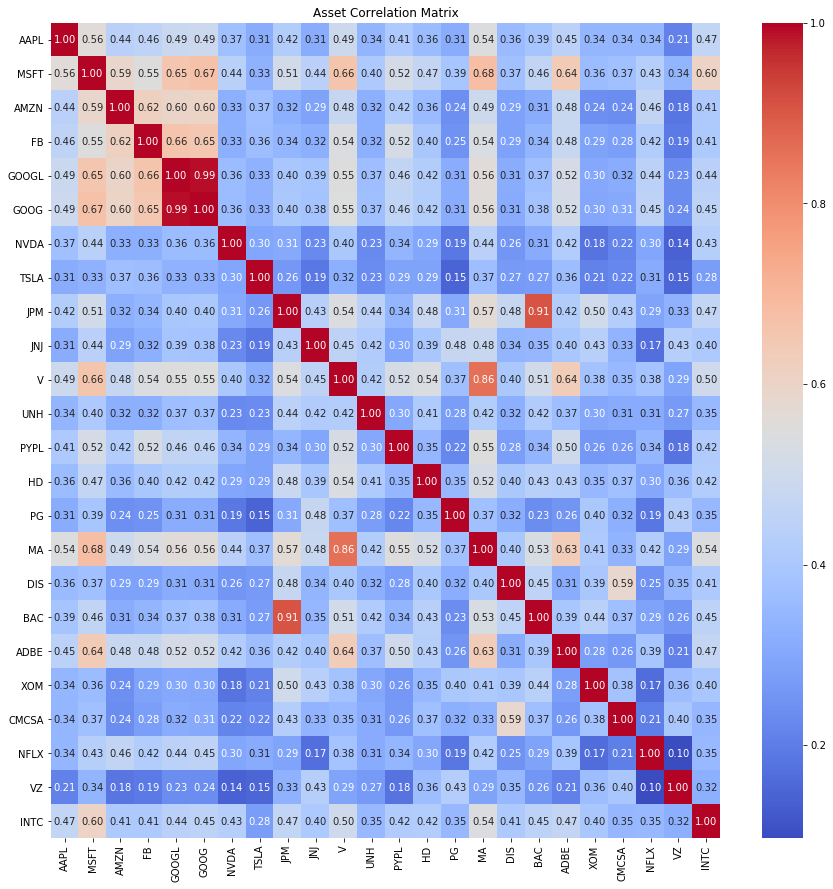

In [59]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(train.pct_change().corr(method = 'pearson'), ax = ax, cmap = 'coolwarm', annot=True, fmt =".2f")
ax.set_title('Asset Correlation Matrix')

In [96]:
def findCointegratedPairs(data):
    n = data.shape[1]
    pvalue_matrix = np.ones((n,n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1,n):
            result = coint(data[keys[i]], data[keys[j]])
            #print()
            #print(i,j)
            #print()
            pvalue_matrix[i, j] =result[1]
            if result[1] < 0.05:
                pairs.append((keys[i], keys[j]))
    #print(n)
    return pvalue_matrix, pairs

pvalues, pairs = findCointegratedPairs(train)
print(pairs)

[('AAPL', 'GOOGL'), ('AAPL', 'GOOG'), ('AAPL', 'HD'), ('MSFT', 'GOOGL'), ('MSFT', 'GOOG'), ('MSFT', 'HD'), ('AMZN', 'ADBE'), ('FB', 'GOOGL'), ('FB', 'GOOG'), ('FB', 'UNH'), ('GOOGL', 'GOOG'), ('GOOGL', 'NVDA'), ('GOOGL', 'JPM'), ('GOOGL', 'V'), ('GOOGL', 'PYPL'), ('GOOGL', 'HD'), ('GOOGL', 'MA'), ('GOOGL', 'ADBE'), ('GOOG', 'NVDA'), ('GOOG', 'JPM'), ('GOOG', 'V'), ('GOOG', 'PYPL'), ('GOOG', 'HD'), ('GOOG', 'MA'), ('GOOG', 'ADBE'), ('NVDA', 'UNH'), ('V', 'MA'), ('V', 'ADBE'), ('UNH', 'HD'), ('PYPL', 'HD'), ('MA', 'ADBE'), ('XOM', 'VZ')]


In [97]:
pvalues

array([[1.00000000e+00, 1.38785011e-01, 3.54784110e-01, 8.16263075e-02,
        1.48097935e-03, 2.74463662e-03, 1.12221402e-01, 4.02517163e-01,
        1.22222687e-01, 8.71581950e-01, 1.06973775e-01, 5.88674470e-02,
        2.41544366e-01, 4.16712256e-02, 9.88335032e-01, 5.65701592e-01,
        9.11597003e-01, 1.53272791e-01, 3.20766578e-01, 9.85595032e-01,
        9.61985155e-01, 7.01277431e-01, 9.28179238e-01, 5.12951197e-01],
       [1.00000000e+00, 1.00000000e+00, 4.53806084e-01, 4.99498885e-01,
        2.39224729e-03, 3.70110918e-03, 1.31722979e-01, 7.59510543e-01,
        8.75413861e-01, 9.83355778e-01, 1.30963263e-01, 2.37796817e-01,
        2.93352106e-01, 2.75741533e-02, 9.93757208e-01, 2.46797907e-01,
        9.64998985e-01, 9.11702765e-01, 6.63554369e-02, 9.82599726e-01,
        9.87002735e-01, 6.00239803e-01, 8.84045733e-01, 1.89368035e-01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 8.70826094e-01,
        2.22234002e-01, 2.76715150e-01, 9.61058300e-01, 9.3939

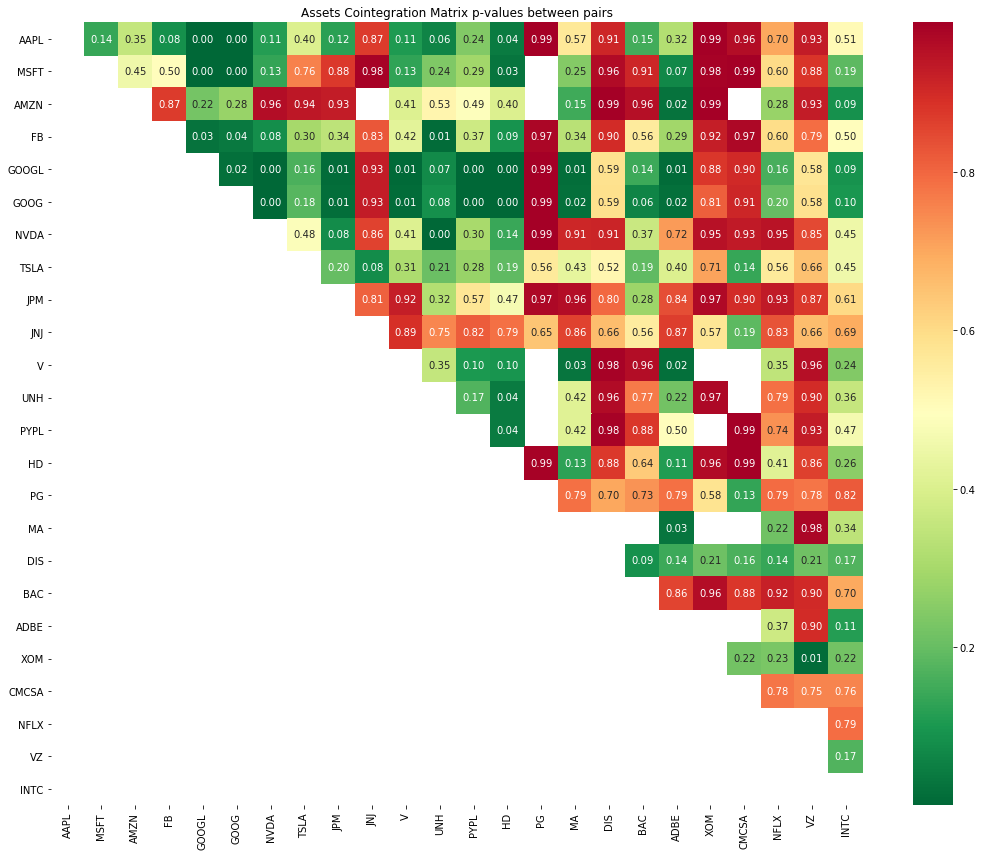

In [103]:
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(pvalues, xticklabels = train.columns, yticklabels = train.columns, cmap = 'RdYlGn_r', annot = True, fmt = ".2f", mask = (pvalues >= 0.99))
ax.set_title('Assets Cointegration Matrix p-values between pairs')
plt.tight_layout()


# Stationary test for selected pair

strategy will not work well if the prices are moving exactly together. test for stationarity of time series using AD-Fuller test. it is imp that the spread is stationary: i.e. mean and variance are constant.

1. First calculate the hedge ratio using OLS regression
2. using hedge ratio, calculate spread
3. run AD-Fuller test

Text(0,0.5,'Closing Price')

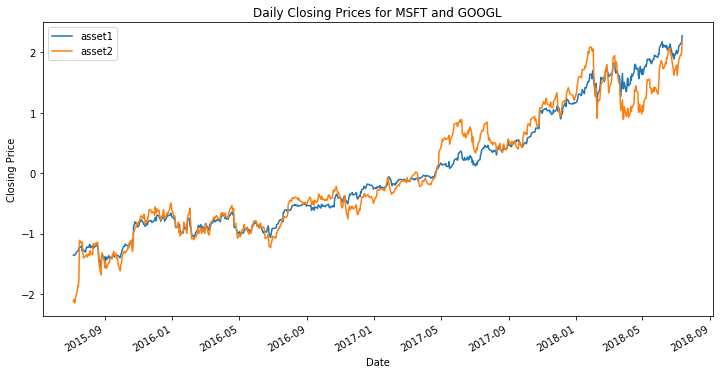

In [113]:
# choose MSFT and GOOGL

asset1 = 'MSFT'
asset2 = 'GOOGL'

train2 = pd.DataFrame()
train2['asset1'] = (train[asset1]-train[asset1].mean())/train[asset1].std() 
train2['asset2'] = (train[asset2]-train[asset2].mean())/train[asset2].std() #normalise prices to see correlation clearly on the same scale

ax = train2[['asset1','asset2']].plot(figsize=(12,6), title = 'Daily Closing Prices for {} and {}'.format(asset1, asset2))
ax.set_ylabel("Closing Price")